In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/Diamond_Prices.csv')
df.head()

,price,carat,cut,color,clarity,table,length,width,depth
0,1053,0.48,Very Good,I,VS1,55.0,4.99,5.03,3.12
1,584,0.34,Premium,D,SI1,58.0,4.43,4.47,2.76
2,9005,1.04,Ideal,F,VVS2,57.0,6.50,6.53,3.99
3,2056,0.70,Premium,G,SI2,61.0,5.66,5.63,3.49
4,9407,1.57,Very Good,H,VS2,56.0,7.46,7.40,4.71


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    500 non-null    int64  
 1   carat    500 non-null    float64
 2   cut      500 non-null    object 
 3   color    500 non-null    object 
 4   clarity  500 non-null    object 
 5   table    500 non-null    float64
 6   length   500 non-null    float64
 7   width    500 non-null    float64
 8   depth    500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
df.isnull().sum().to_frame('Null Count')

,Null Count
price,0
carat,0
cut,0
color,0
clarity,0
table,0
length,0
width,0
depth,0


In [10]:
df.duplicated().to_frame('Has Duplicated')

,Has Duplicated
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [404]:
# Fair, Good, Very Good, Premium, Ideal
# Cut: 1, 2, 3, 4, 5

# change the cut column to numerical, create new column
df['cut_rating'] = df['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5})

In [405]:
# I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
# Clarity: 1, 2, 3, 4, 5, 6, 7, 8

# change the clarity column to numerical
df['clarity_rating'] = df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})

In [406]:
# J (worst) to D (best)
# Color: 1, 2, 3, 4, 5, 6, 7

# change the color column to numerical
df['color_rating'] = df['color'].map({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7})

In [407]:
filtered_df = df[['carat', 'cut_rating', 'clarity_rating', 'color_rating', 'price', 'depth', 'table', 'length', 'width']]

In [408]:
filtered_df.head()

,carat,cut_rating,clarity_rating,color_rating,price,depth,table,length,width
0,0.48,3,5,2,1053,3.12,55.0,4.99,5.03
1,0.34,4,3,7,584,2.76,58.0,4.43,4.47
2,1.04,5,6,5,9005,3.99,57.0,6.50,6.53
3,0.70,4,2,4,2056,3.49,61.0,5.66,5.63
4,1.57,3,4,3,9407,4.71,56.0,7.46,7.40


In [409]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           500 non-null    float64
 1   cut_rating      500 non-null    int64  
 2   clarity_rating  500 non-null    int64  
 3   color_rating    500 non-null    int64  
 4   price           500 non-null    int64  
 5   depth           500 non-null    float64
 6   table           500 non-null    float64
 7   length          500 non-null    float64
 8   width           500 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 35.3 KB


In [410]:
# correlation matrix
corr = filtered_df.corr()

<Axes: >

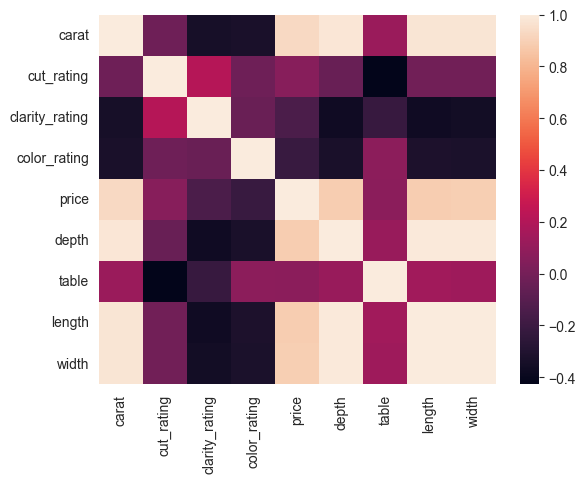

In [411]:
# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

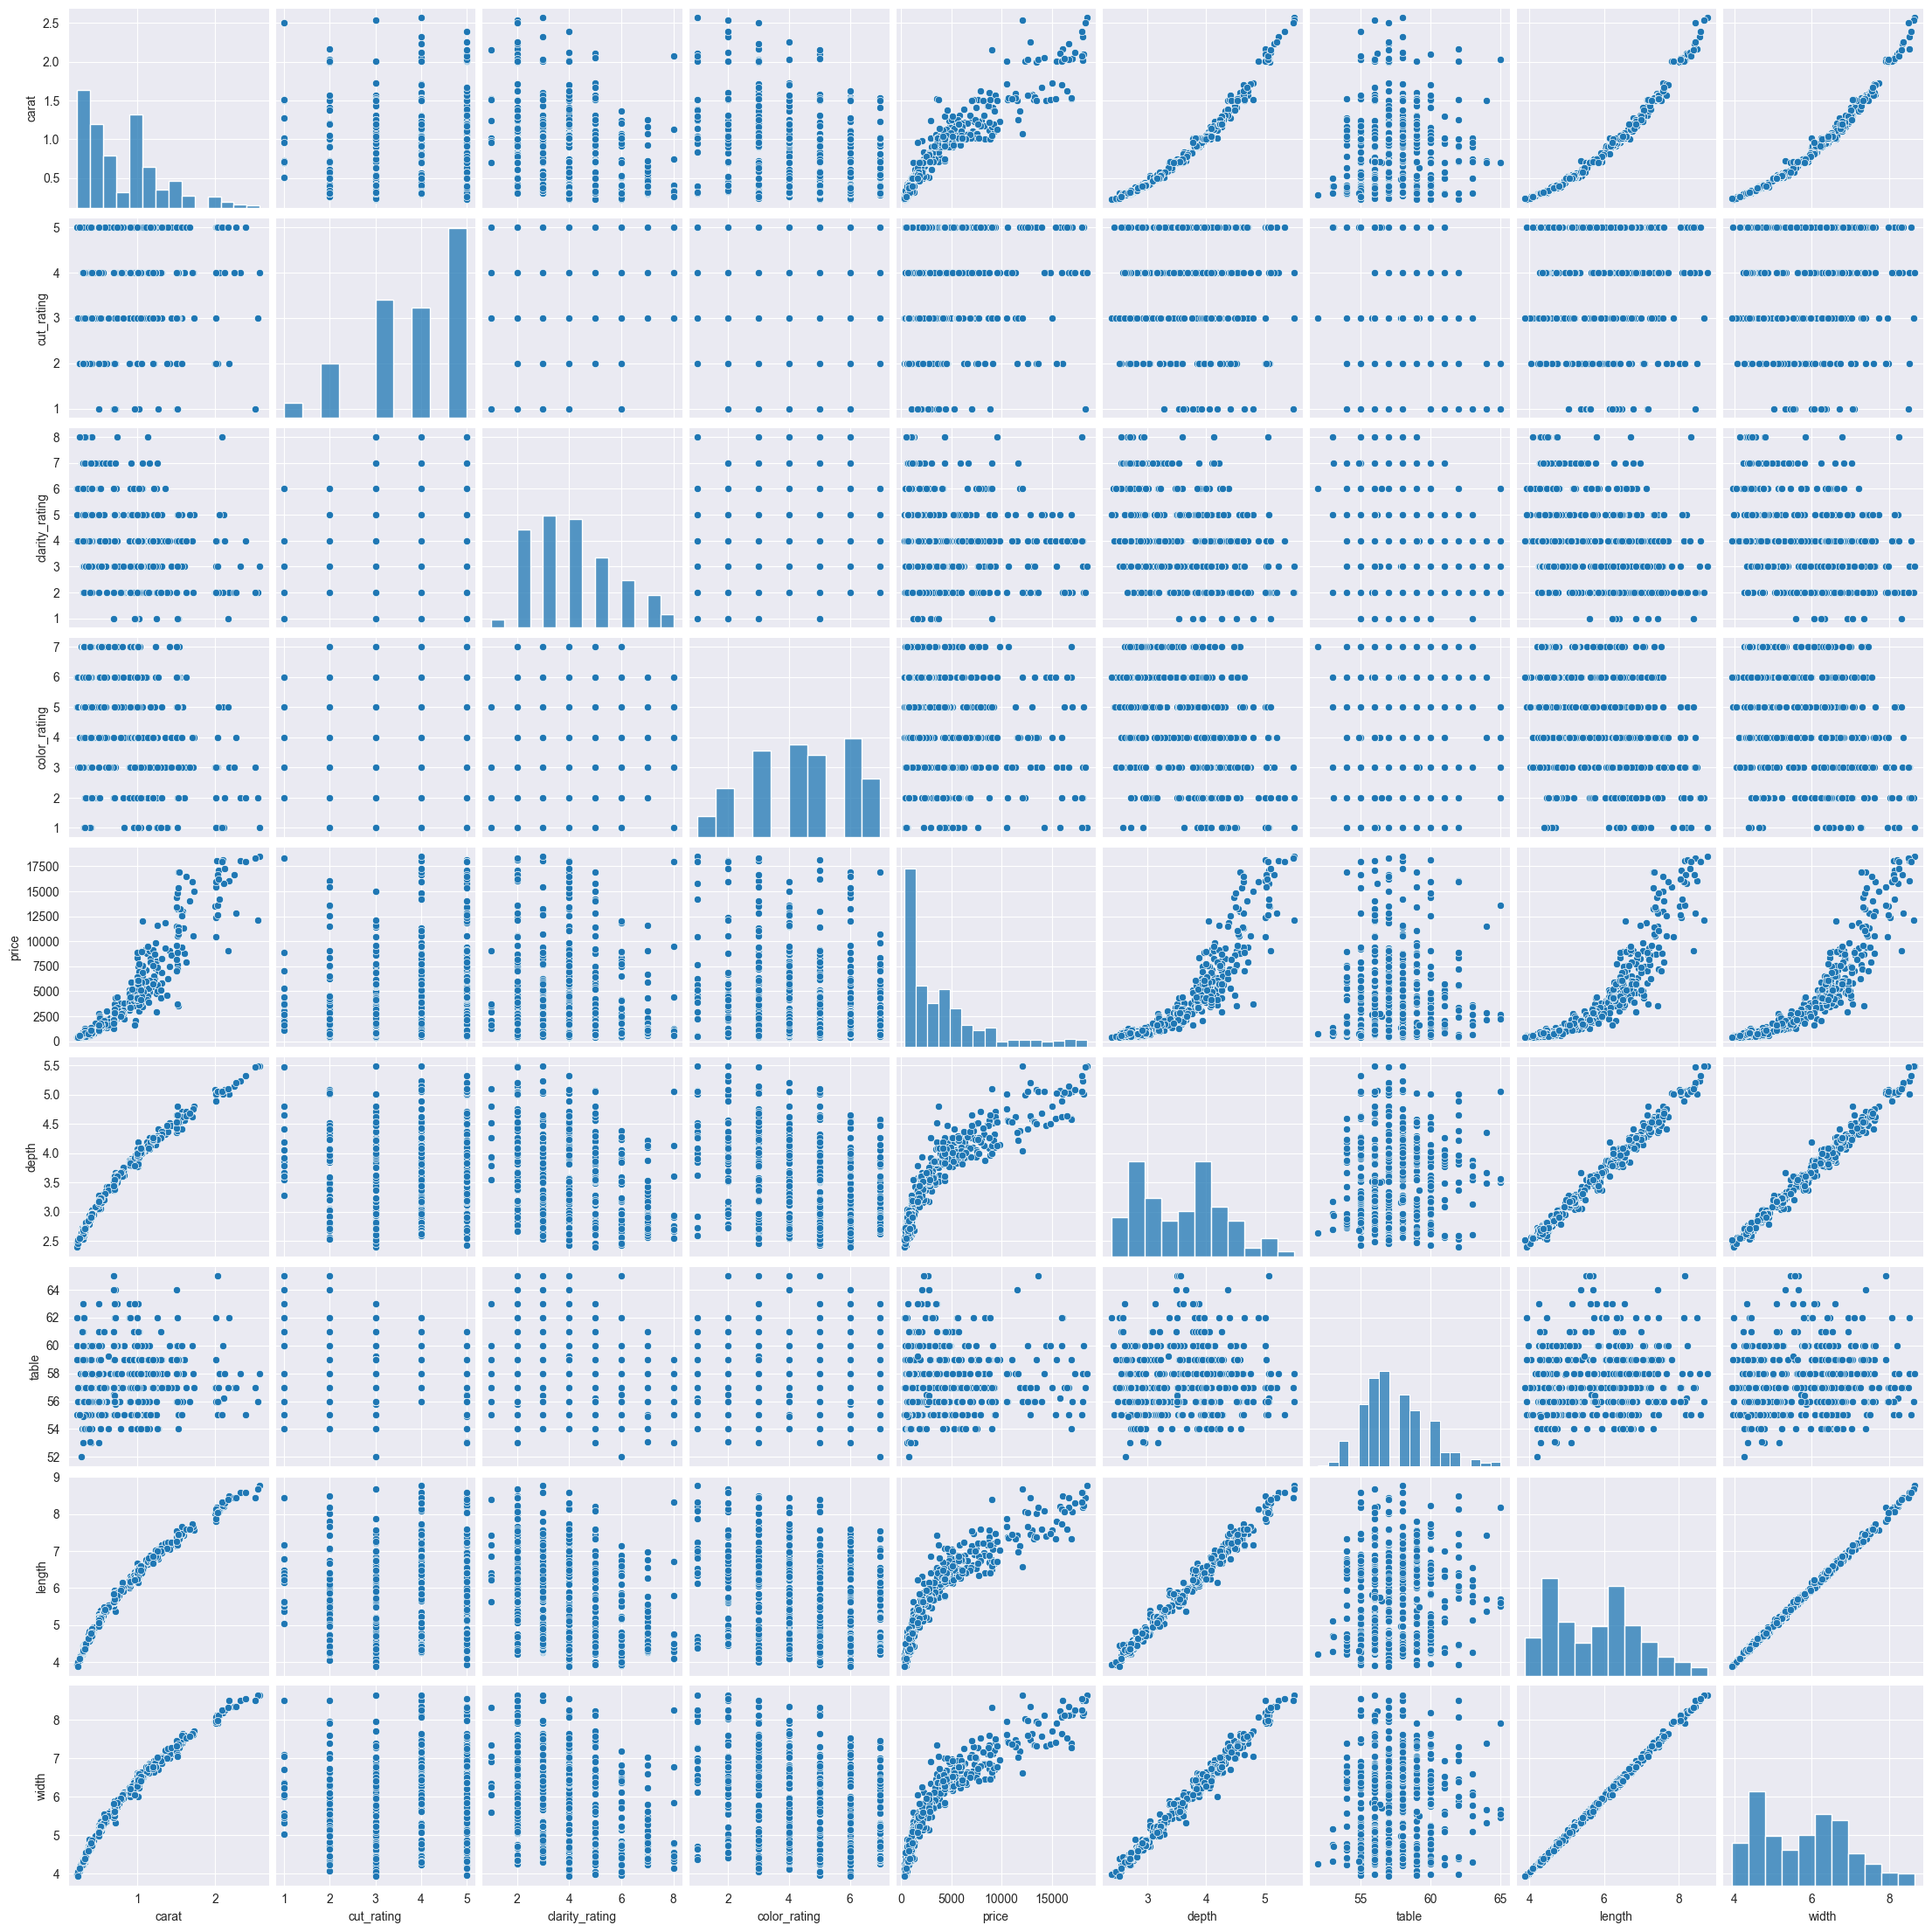

In [412]:
# Generate pair plot
sns.pairplot(filtered_df)

In [413]:
from sklearn.model_selection import train_test_split

In [414]:
X = filtered_df[['carat', 'cut_rating', 'clarity_rating', 'color_rating', 'depth', 'table', 'length', 'width']]
y = filtered_df['price']

In [415]:
y.describe()

count      500.000000
mean      4161.310000
std       4202.128982
min        367.000000
25%        990.000000
50%       2729.000000
75%       5643.000000
max      18485.000000
Name: price, dtype: float64

In [416]:
price_range = filtered_df['price'].max() - filtered_df['price'].min()

In [417]:
price_scaled = (df['price'] - df['price'].min()) / price_range

In [418]:
price_scaled = price_scaled * 100

In [419]:
y = price_scaled

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

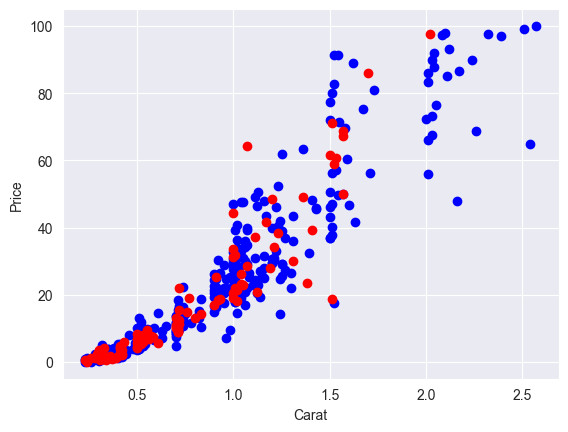

In [421]:
plt.scatter(X_train['carat'], y_train, color='blue')
plt.scatter(X_test['carat'], y_test, color='red')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [422]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_baseline = lr_model.fit(X_train, y_train)
y_predict = lr_baseline.predict(X_test)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_baseline.coef_})

print(coef_df)

print ('Coefficients: ', lr_baseline.coef_)
print ('Intercept: ', lr_baseline.intercept_)

          Feature  Coefficient
0           carat    66.220643
1      cut_rating     0.423673
2  clarity_rating     2.708848
3    color_rating     2.060469
4           depth   -10.990888
5           table    -0.145078
6          length   -15.321582
7           width    14.675074
Coefficients:  [ 66.22064344   0.42367299   2.70884814   2.06046878 -10.99088817
  -0.14507828 -15.32158164  14.67507408]
Intercept:  -4.108493443326907


In [423]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2-score: %.2f" % r2)

MAE: 4.28
MSE: 40.32
RMSE: 6.35
R2-score: 0.91


In [424]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [425]:
from sklearn.model_selection import KFold

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [426]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3],
}

lr_poly = GridSearchCV(estimator, params, cv=kf)

In [427]:
for train_index, test_index in kf.split(X_train):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')
    Xcv_train, Xcv_test, ycv_train, ycv_test = (X.iloc[train_index, :],
                                                    X.iloc[test_index, :],
                                                    y[train_index],
                                                    y[test_index])

Train index: [ 1  3  4  5  7  8 10 11 12 13] 266
Test index: [ 0  2  6  9 15 19 23 25 26 27] 134

Train index: [ 0  2  6  8  9 10 11 12 13 15] 267
Test index: [ 1  3  4  5  7 14 16 17 22 30] 133

Train index: [ 0  1  2  3  4  5  6  7  9 14] 267
Test index: [ 8 10 11 12 13 18 20 21 24 28] 133



In [428]:
lr_poly.fit(Xcv_train, ycv_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [429]:
pf = PolynomialFeatures(degree=lr_poly.best_params_['polynomial_features__degree'])

lr_poly2 = Pipeline([("make_higher_degree", pf),
                    ("linear_regression", LinearRegression())])

lr_poly2 = lr_poly2.fit(Xcv_train, ycv_train)
lr_poly2.score(Xcv_train, ycv_train)

0.980295198326746

In [430]:
lr_poly2.named_steps["make_higher_degree"].get_feature_names_out()

array(['1', 'carat', 'cut_rating', 'clarity_rating', 'color_rating',
       'depth', 'table', 'length', 'width', 'carat^2', 'carat cut_rating',
       'carat clarity_rating', 'carat color_rating', 'carat depth',
       'carat table', 'carat length', 'carat width', 'cut_rating^2',
       'cut_rating clarity_rating', 'cut_rating color_rating',
       'cut_rating depth', 'cut_rating table', 'cut_rating length',
       'cut_rating width', 'clarity_rating^2',
       'clarity_rating color_rating', 'clarity_rating depth',
       'clarity_rating table', 'clarity_rating length',
       'clarity_rating width', 'color_rating^2', 'color_rating depth',
       'color_rating table', 'color_rating length', 'color_rating width',
       'depth^2', 'depth table', 'depth length', 'depth width', 'table^2',
       'table length', 'table width', 'length^2', 'length width',
       'width^2'], dtype=object)

In [431]:
y_poly2_pred = lr_poly2.predict(Xcv_test)

In [432]:
r2_score(ycv_test, y_poly2_pred)

0.9443869474718168

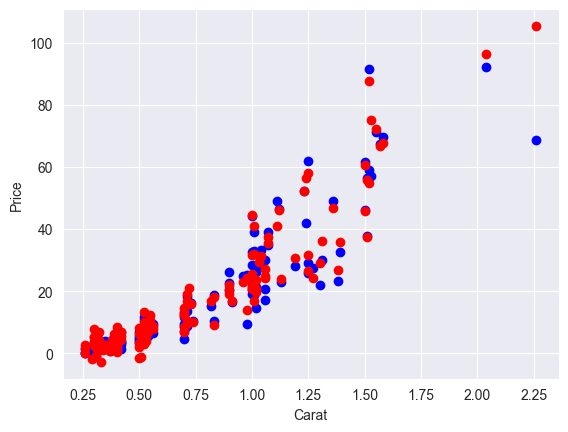

In [433]:
plt.scatter(Xcv_test['carat'], ycv_test, color='blue')
plt.scatter(Xcv_test['carat'], y_poly2_pred, color='red')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [434]:
mae = mean_absolute_error(ycv_test, y_poly2_pred)
mse = mean_squared_error(ycv_test, y_poly2_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ycv_test, y_poly2_pred)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("R2-score: %.2f" % r2)

MAE: 2.70
MSE: 22.21
RMSE: 4.71
R2-score: 0.94


In [435]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [436]:
from sklearn.linear_model import Lasso

estimator2 = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params2 = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': [0.0001,0.001,0.05,0.1,1]
}

lr_opt = GridSearchCV(estimator2, params2, cv=kf)

In [437]:
lr_poly_opt = lr_opt.fit(Xcv_train, ycv_train)

/Users/zixucheah331/Developer/Learn/MLPC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.607e+03, tolerance: 8.815e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zixucheah331/Developer/Learn/MLPC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.392e+03, tolerance: 1.006e+01
  model = cd_fast.enet_coordinate_descent(
/Users/zixucheah331/Developer/Learn/MLPC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

In [438]:
lr_poly_opt.best_score_, lr_poly_opt.best_params_

(0.9742512743956314,
 {'lasso_regression__alpha': 0.1, 'polynomial_features__degree': 3})

In [439]:
lr_poly2_l1_001 = Pipeline([("scaler", StandardScaler()),
                            ("polynomial_features", PolynomialFeatures(degree=lr_poly_opt.best_params_['polynomial_features__degree'])),
                            ("lasso_regression", Lasso(alpha=lr_poly_opt.best_params_['lasso_regression__alpha']))])

lr_poly2_l1 = lr_poly2_l1_001.fit(Xcv_train, ycv_train)
lr_poly2_l1.score(Xcv_train, ycv_train)

0.9877677138736717

In [440]:
y_lr_poly2_l1_pred = lr_poly2_l1.predict(Xcv_test)

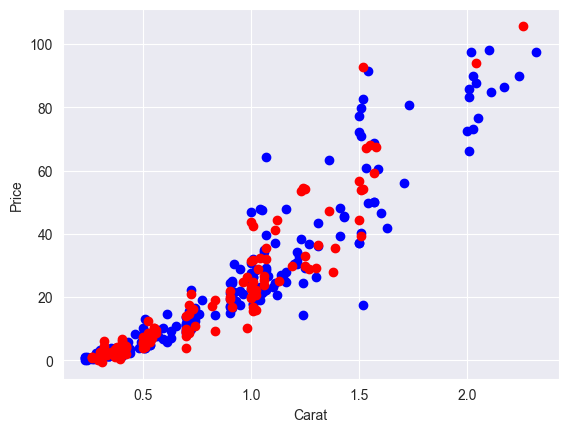

In [441]:
plt.scatter(Xcv_train['carat'], ycv_train, color='blue')
plt.scatter(Xcv_test['carat'], y_lr_poly2_l1_pred, color='red')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [442]:
mae = mean_absolute_error(ycv_test, y_lr_poly2_l1_pred)
mse = mean_squared_error(ycv_test, y_lr_poly2_l1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ycv_test, y_lr_poly2_l1_pred)

print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("MSE: %.2f" % rmse)
print("R2-score: %.2f" % r2)

MAE: 2.17
MSE: 18.95
MSE: 4.35
R2-score: 0.95
